In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 21.0 MB/s eta 0:00:00


In [ ]:
pip install lightgbm

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as cat
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
merged_data_dummy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/merged_data_dummy.csv')

In [ ]:
# prompt: Using dataframe merged_data_dummy: loop for all int64 types and convert to int32 in dataframe merged_data_dummy

for col in merged_data_dummy.select_dtypes(include=['int64']):
    merged_data_dummy[col] = merged_data_dummy[col].astype('int32')

for col in merged_data_dummy.select_dtypes(include=['float64']):
    merged_data_dummy[col] = merged_data_dummy[col].astype('float32')


In [ ]:
merged_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380746 entries, 0 to 380745
Columns: 1249 entries, Severity to State_WY
dtypes: float32(2), int32(1247)
memory usage: 1.8 GB


In [ ]:
merged_data_dummy.head()

,Severity,LocationLat,LocationLng,month,year,day,hour,minute,second,TimeZone_US/Central,...,State_SC,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,2,39.169224,-123.211388,12,2016,1,3,38,32,0,...,0,0,0,0,0,0,0,0,0,0
1,2,37.371304,-120.613731,12,2016,1,3,57,44,0,...,0,0,0,0,0,0,0,0,0,0
2,2,37.500683,-122.241310,12,2016,1,5,13,53,0,...,0,0,0,0,0,0,0,0,0,0
3,2,38.243504,-122.268661,12,2016,1,19,34,31,0,...,0,0,0,0,0,0,0,0,0,0
4,2,38.243504,-122.268661,12,2016,1,19,34,31,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cols = list(merged_data_dummy.columns)

In [ ]:
cols.remove('Severity')

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_curve, auc

vars=['LocationLat', 'LocationLng', 'month','year','day','hour','minute','second']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale all of the dummy variables
#merged_scaler = scaler.fit_transform(merged_data_dummy_backup)
merged_data_dummy[vars]=scaler.fit_transform(merged_data_dummy[vars])
merged_data_dummy.head()

,Severity,LocationLat,LocationLng,month,year,day,hour,minute,second,TimeZone_US/Central,...,State_SC,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,2,0.601183,0.023336,1.0,0.0,0.0,0.130435,0.644068,0.542373,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.527210,0.069155,1.0,0.0,0.0,0.130435,0.966102,0.745763,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.532533,0.040447,1.0,0.0,0.0,0.217391,0.220339,0.898305,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0.563095,0.039965,1.0,0.0,0.0,0.826087,0.576271,0.525424,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0.563095,0.039965,1.0,0.0,0.0,0.826087,0.576271,0.525424,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
merged_data_dummy_backup = merged_data_dummy.copy()

In [ ]:
merged_data_undersample = merged_data_dummy.copy()

In [ ]:
X_1 = merged_data_dummy_backup.drop('Severity', axis=1)
y_1 = merged_data_dummy_backup['Severity']

Class=2, n=244885 (64.317%)
Class=3, n=133782 (35.137%)
Class=1, n=172 (0.045%)
Class=4, n=1891 (0.497%)
Class=0, n=16 (0.004%)


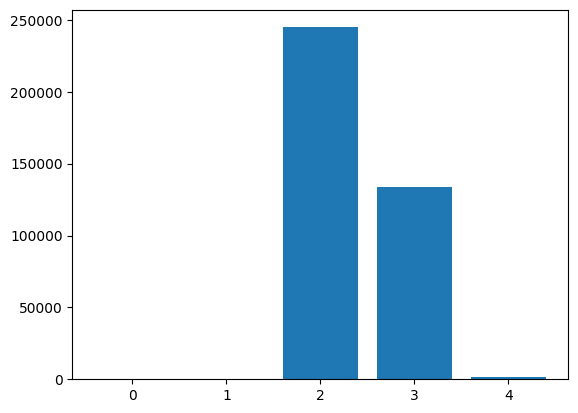

In [ ]:
from collections import Counter
from matplotlib import pyplot

# summarize distribution
counter = Counter(y_1)
for k,v in counter.items():
 per = v / len(y_1) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
print(merged_data_dummy_backup['Severity'].value_counts(normalize=True))

2    0.643172
3    0.351368
4    0.004967
1    0.000452
0    0.000042
Name: Severity, dtype: float64


In [ ]:
merged_data_undersample.drop(merged_data_undersample[(merged_data_undersample['Severity'] == 0) | (merged_data_undersample['Severity'] == 1)].index, inplace=True)

In [ ]:
X_2 = merged_data_undersample.drop('Severity', axis=1)
y_2 = merged_data_undersample['Severity']

Class=2, n=244885 (64.349%)
Class=3, n=133782 (35.154%)
Class=4, n=1891 (0.497%)


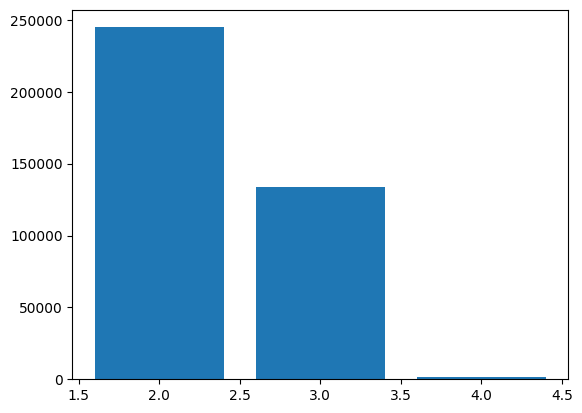

In [ ]:
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# summarize distribution
counter = Counter(y_2)
for k,v in counter.items():
 per = v / len(y_2) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
print(merged_data_undersample['Severity'].value_counts(normalize=True))

2    0.643489
3    0.351542
4    0.004969
Name: Severity, dtype: float64


Oversample using SMOTE

Class=2, n=244885 (20.000%)
Class=3, n=244885 (20.000%)
Class=1, n=244885 (20.000%)
Class=4, n=244885 (20.000%)
Class=0, n=244885 (20.000%)


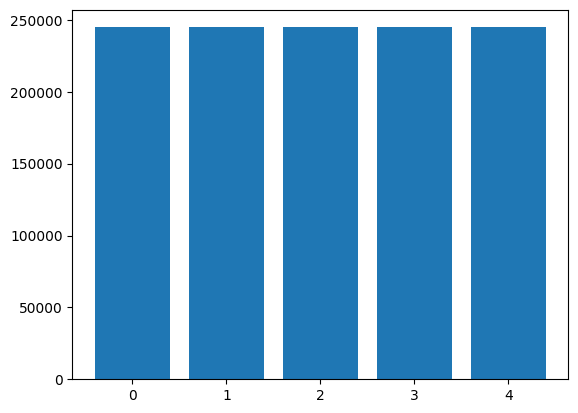

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_3, y_3 = oversample.fit_resample(X_1, y_1)
# summarize distribution
counter = Counter(y_3)
for k,v in counter.items():
 per = v / len(y_3) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Under sampling using Random Under Sampler

Class=2, n=1891 (33.333%)
Class=3, n=1891 (33.333%)
Class=4, n=1891 (33.333%)


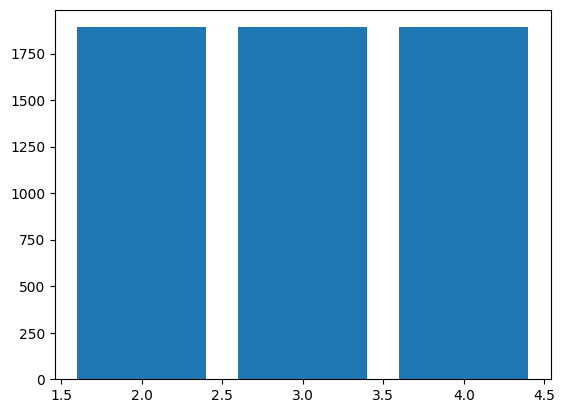

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
X_4, y_4= undersample.fit_resample(X_2,y_2)
# summarize distribution
counter = Counter(y_4)
for k,v in counter.items():
 per = v / len(y_4) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
# Create and fit SelectKBest with chi-squared test
selector_1 = SelectKBest(chi2, k=10)
X_selected_1 = selector_1.fit_transform(X_3, y_3)

In [ ]:
print('Original feature number:', X_3.shape[1])
print('Reduced feature number:', X_selected_1.shape[1])

Original feature number: 1248
Reduced feature number: 10


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
selector_3 = SelectKBest(f_regression, k=100)
X_selected_3 = selector_3.fit_transform(X_3, y_3)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
# Create and fit SelectKBest with chi-squared test
selector_2 = SelectKBest(chi2, k=10)
X_selected_2 = selector_2.fit_transform(X_4, y_4)

In [ ]:
print('Original feature number:', X_4.shape[1])
print('Reduced feature number:', X_selected_2.shape[1])

Original feature number: 1248
Reduced feature number: 10


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
selector_4 = SelectKBest(f_regression, k=100)
X_selected_4 = selector_4.fit_transform(X_4, y_4)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Create the SelectKBest object with k=100 and f_regression scoring function

selector_3 = SelectKBest(f_regression, k=100)

# Fit the selector to the data
selector_3.fit(X_3, y_3)

# Obtain the list of selected column indices
selected_indices_1 = selector_3.get_support()

# Extract the selected column names using the indices and feature names
selected_column_names_1 = X_3.columns[selected_indices_1]

# Print the selected column names
print(selected_column_names_1)

Index(['LocationLat', 'month', 'day', 'minute', 'second',
       'TimeZone_US/Central', 'TimeZone_US/Eastern', 'TimeZone_US/Mountain',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Tuesday',
       'Weather_Type_Fog', 'Weather_Type_Snow', 'Weather_Severity_Heavy',
       'Weather_Severity_Light', 'Weather_Severity_Moderate',
       'Weather_Severity_Severe', 'City_Alabaster', 'City_Alta',
       'City_Arlington', 'City_Atlanta', 'City_Big Spring', 'City_Birmingham',
       'City_Boca Raton', 'City_Brookshire', 'City_Chattanooga',
       'City_Chesapeake', 'City_Cleveland', 'City_Columbus', 'City_Dallas',
       'City_Dekalb', 'City_Delaware', 'City_Deridder', 'City_East Haven',
       'City_Fletcher', 'City_Fort Lauderdale', 'City_Fort Worth',
       'City_Fredericksburg', 'City_Gonzales', 'City_Greensboro',
       'City_Greenville', 'City_Hillsville', 'City_Indianapolis',
       'City_Jackson', 'City_Jacksonville', 'City_Jonestown', 'City_Kennesaw',
       'City_Las Vegas', 'C

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Create the SelectKBest object with k=100 and f_regression scoring function
selector_4 = SelectKBest(f_regression, k=100)

# Fit the selector to the data
selector_4.fit(X_4, y_4)

# Obtain the list of selected column indices
selected_indices = selector_4.get_support()

# Extract the selected column names using the indices and feature names
selected_column_names = X_4.columns[selected_indices]

# Print the selected column names
print(selected_column_names)

Index(['year', 'hour', 'TimeZone_US/Mountain', 'TimeZone_US/Pacific',
       'Weekday_Monday', 'Weekday_Sunday', 'Weather_Type_Fog',
       'Weather_Type_Snow', 'City_Alabaster', 'City_Anderson',
       'City_Ann Arbor', 'City_Atlanta', 'City_Augusta', 'City_Austin',
       'City_Bakersfield', 'City_Baton Rouge', 'City_Beaufort',
       'City_Big Spring', 'City_Boca Raton', 'City_Brookshire',
       'City_Columbus', 'City_Concord', 'City_Conway', 'City_Cotulla',
       'City_Dallas', 'City_Dekalb', 'City_Delaware', 'City_Eastover',
       'City_Farmingdale', 'City_Fletcher', 'City_Fort Lauderdale',
       'City_Fort Myers', 'City_Ganado', 'City_Goleta', 'City_Gonzales',
       'City_Greensboro', 'City_Greenville', 'City_Greenwood', 'City_Greer',
       'City_Half Moon Bay', 'City_Hartsville', 'City_Hillsville',
       'City_Homestead', 'City_Houston', 'City_Jackson', 'City_Jacksonville',
       'City_Kennesaw', 'City_Lafayette', 'City_Lancaster', 'City_Las Vegas',
       'City_Laurens'

In [ ]:
X_selected_3 = selector_3.transform(X_3)

In [ ]:
X_selected_4 = selector_4.transform(X_4)

In [ ]:
col_under= ['year', 'hour', 'TimeZone_US/Mountain', 'TimeZone_US/Pacific',
       'Weekday_Monday', 'Weekday_Sunday', 'Weather_Type_Fog',
       'Weather_Type_Snow', 'City_Alabaster', 'City_Anderson',
       'City_Ann Arbor', 'City_Atlanta', 'City_Augusta', 'City_Austin',
       'City_Bakersfield', 'City_Baton Rouge', 'City_Beaufort',
       'City_Big Spring', 'City_Boca Raton', 'City_Brookshire',
       'City_Columbus', 'City_Concord', 'City_Conway', 'City_Cotulla',
       'City_Dallas', 'City_Dekalb', 'City_Delaware', 'City_Eastover',
       'City_Farmingdale', 'City_Fletcher', 'City_Fort Lauderdale',
       'City_Fort Myers', 'City_Ganado', 'City_Goleta', 'City_Gonzales',
       'City_Greensboro', 'City_Greenville', 'City_Greenwood', 'City_Greer',
       'City_Half Moon Bay', 'City_Hartsville', 'City_Hillsville',
       'City_Homestead', 'City_Houston', 'City_Jackson', 'City_Jacksonville',
       'City_Kennesaw', 'City_Lafayette', 'City_Lancaster', 'City_Las Vegas',
       'City_Laurens', 'City_Liberty', 'City_Macon', 'City_Manor',
       'City_Marion', 'City_Miami', 'City_Moncks Corner', 'City_Morrisville',
       'City_Napa', 'City_Needles', 'City_New Orleans', 'City_Newark',
       'City_Opa Locka', 'City_Orangeburg', 'City_Orlando', 'City_Pottstown',
       'City_Quantico', 'City_Rensselaer', 'City_Rockwall', 'City_Seneca',
       'City_South Burlington', 'City_South Haven', 'City_Statesville',
       'City_Sumter', 'City_Sweetwater', 'City_Thomson', 'City_Troutdale',
       'City_Tulsa', 'City_Vicksburg', 'City_West Chicago', 'City_Westfield',
       'City_Weyers Cave', 'City_Williams', 'City_Yukon', 'State_AR',
       'State_AZ', 'State_CA', 'State_GA', 'State_IN', 'State_MI', 'State_MN',
       'State_MS', 'State_NH', 'State_NM', 'State_OK', 'State_SC', 'State_VA',
       'State_VT', 'State_WV', 'State_WY']

In [ ]:
col_over = ['LocationLat', 'month', 'day', 'minute', 'second',
       'TimeZone_US/Central', 'TimeZone_US/Eastern', 'TimeZone_US/Mountain',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Tuesday',
       'Weather_Type_Fog', 'Weather_Type_Snow', 'Weather_Severity_Heavy',
       'Weather_Severity_Light', 'Weather_Severity_Moderate',
       'Weather_Severity_Severe', 'City_Alabaster', 'City_Alta',
       'City_Arlington', 'City_Atlanta', 'City_Big Spring', 'City_Birmingham',
       'City_Boca Raton', 'City_Brookshire', 'City_Chattanooga',
       'City_Chesapeake', 'City_Cleveland', 'City_Columbus', 'City_Dallas',
       'City_Dekalb', 'City_Delaware', 'City_Deridder', 'City_East Haven',
       'City_Fletcher', 'City_Fort Lauderdale', 'City_Fort Worth',
       'City_Fredericksburg', 'City_Gonzales', 'City_Greensboro',
       'City_Greenville', 'City_Hillsville', 'City_Indianapolis',
       'City_Jackson', 'City_Jacksonville', 'City_Jonestown', 'City_Kennesaw',
       'City_Las Vegas', 'City_Lebec', 'City_Los Angeles', 'City_Macon',
       'City_Marshall', 'City_Nashville', 'City_Needles', 'City_New Orleans',
       'City_Newark', 'City_Ocala', 'City_Puyallup', 'City_Quantico',
       'City_Rensselaer', 'City_Rockwall', 'City_Sacramento', 'City_San Diego',
       'City_San Jose', 'City_South Burlington', 'City_South Haven',
       'City_Statesville', 'City_Tampa', 'City_Thomson', 'City_Troutdale',
       'City_Vicksburg', 'City_Walterboro', 'City_Weyers Cave',
       'City_Williams', 'City_Windsor', 'City_Winston Salem', 'State_AL',
       'State_AR', 'State_AZ', 'State_CO', 'State_CT', 'State_FL', 'State_GA',
       'State_IA', 'State_IL', 'State_IN', 'State_LA', 'State_MI', 'State_MS',
       'State_NJ', 'State_NM', 'State_NY', 'State_OH', 'State_OR', 'State_PA',
       'State_SC', 'State_VA', 'State_VT', 'State_WI', 'State_WV']

Scaling Target variable

In [ ]:
y_scaled_over = scaler.fit_transform(y_3.values.reshape(-1, 1))

In [ ]:
y_scaled_under = scaler.fit_transform(y_4.values.reshape(-1, 1))

Split dataset to train and test

In [ ]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_selected_3, y_scaled_over, test_size=0.3)

In [ ]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_selected_4, y_scaled_under, test_size=0.4)

Model 1 under smaple catboost regressor

In [ ]:
X_train_u.shape

(4538, 100)

In [ ]:
X_train_o.shape

(857097, 100)

In [ ]:
model = CatBoostRegressor()
model.fit(X_train_u, y_train_u)
model.get_feature_importance()
print(model)

Learning rate set to 0.049684
0:	learn: 0.4030771	total: 50.6ms	remaining: 50.6s
1:	learn: 0.3994694	total: 51.7ms	remaining: 25.8s
2:	learn: 0.3963876	total: 52.7ms	remaining: 17.5s
3:	learn: 0.3935539	total: 54.1ms	remaining: 13.5s
4:	learn: 0.3908793	total: 60.5ms	remaining: 12s
5:	learn: 0.3886714	total: 62.1ms	remaining: 10.3s
6:	learn: 0.3865159	total: 63.5ms	remaining: 9.01s
7:	learn: 0.3843684	total: 65.2ms	remaining: 8.08s
8:	learn: 0.3826370	total: 70ms	remaining: 7.71s
9:	learn: 0.3805932	total: 72.8ms	remaining: 7.21s
10:	learn: 0.3789909	total: 74ms	remaining: 6.66s
11:	learn: 0.3772835	total: 75.3ms	remaining: 6.2s
12:	learn: 0.3752733	total: 76.6ms	remaining: 5.82s
13:	learn: 0.3738215	total: 78.5ms	remaining: 5.53s
14:	learn: 0.3720510	total: 80.7ms	remaining: 5.3s
15:	learn: 0.3705309	total: 83.6ms	remaining: 5.14s
16:	learn: 0.3695467	total: 85.1ms	remaining: 4.92s
17:	learn: 0.3683743	total: 86.7ms	remaining: 4.73s
18:	learn: 0.3671561	total: 88.3ms	remaining: 4.56s


In [ ]:
model.feature_importances_

array([19.43482853, 22.37269132,  0.60676497,  1.85087754,  1.32616932,
        1.74467935,  1.2439168 ,  1.26249209,  0.28225909,  0.08739741,
        0.04815616,  0.26642703,  2.67543874,  0.43284344,  0.0838449 ,
        0.41412398,  0.20308009,  0.32765056,  0.06023521,  0.45206657,
        1.03496607,  0.2433439 ,  0.06475759,  0.11500922,  0.71369723,
        0.38130234,  0.26167884,  0.02937544,  0.26915739,  0.26339251,
        2.37464565,  0.33814157,  0.48111683,  0.28313781,  0.18371783,
        0.04729599,  0.50176099,  0.11161519,  0.27652936,  0.07119624,
        0.2615299 ,  0.06309587,  0.4763931 ,  0.30527124,  0.32795698,
        0.64984442,  0.17335097,  0.35749428,  0.0929758 ,  0.55930587,
        0.07938162,  0.07857587,  0.18031423,  0.82454762,  0.1969389 ,
        0.09452129,  0.1502459 ,  0.44547117,  0.11311904,  0.27509279,
        0.97761927,  0.8311153 ,  0.48374695,  0.08270763,  0.16534158,
        0.28425688,  0.26959787,  0.30631715,  0.49672733,  0.29

In [ ]:
# Make predictions on the test data
y_train_pred_u = model.predict(X_train_u)
print(y_train_pred_u)



[0.37918612 0.61725009 0.97762947 ... 0.60015048 0.57081345 0.31238873]


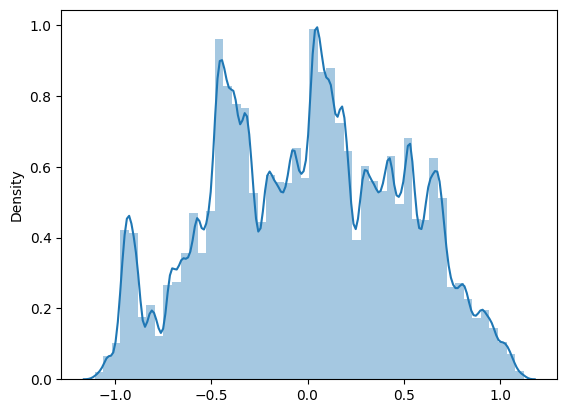

In [ ]:
res = y_train_u - y_train_pred_u
sns.distplot(res)
plt.show()



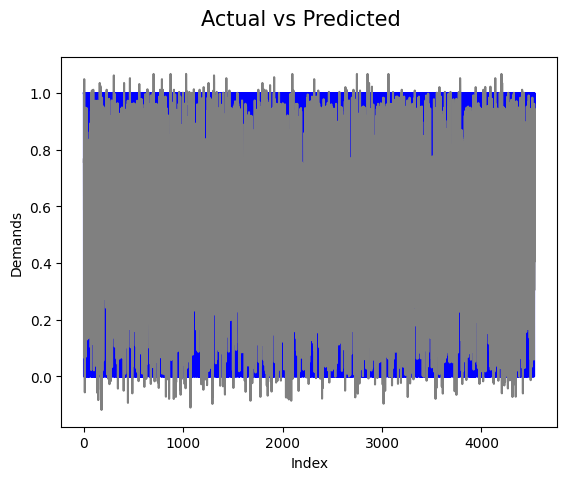

In [ ]:
c = [i for i in range(0,len(X_train_u),1)]
plt.plot(c,y_train_u, color="blue")
plt.plot(c,y_train_pred_u, color="gray")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()



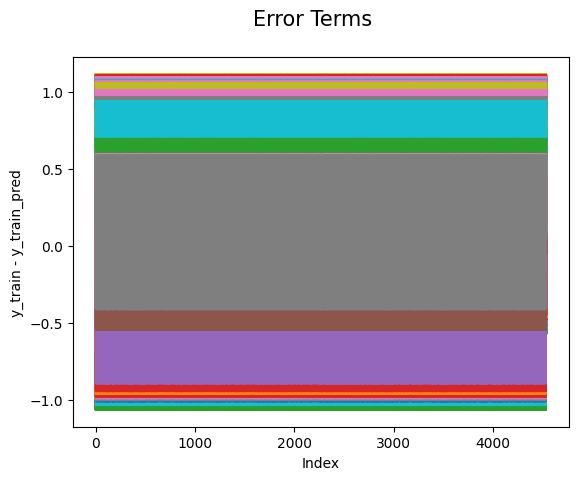

In [ ]:
c = [i for i in range(0,len(X_train_u),1)]
plt.plot(c,res)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train - y_train_pred')
plt.show()



In [ ]:
y_train_pred_u = y_train_pred_u.reshape(-1, 1)

In [ ]:
y_train_pred_u

array([[0.37918612],
       [0.61725009],
       [0.97762947],
       ...,
       [0.60015048],
       [0.57081345],
       [0.31238873]])

In [ ]:
y_train_u

array([[0. ],
       [0. ],
       [1. ],
       ...,
       [0.5],
       [0.5],
       [0.5]])

In [ ]:
y_train_u = y_train_u[:, 0]
y_train_pred_u = y_train_pred_u[:, 0]

In [ ]:
print(type(y_train_u))
print(type(y_train_pred_u))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(y_train_u)
print(y_train_pred_u)

[0.  0.  1.  ... 0.5 0.5 0.5]
[0.37918612 0.61725009 0.97762947 ... 0.60015048 0.57081345 0.31238873]


In [ ]:
y_train_u.shape

(4538,)

In [ ]:
y_train_pred_u.shape

(4538,)

In [ ]:
df_1 = pd.DataFrame({'Actual': y_train_u, 'Predicted': y_train_pred_u})
df_1

,Actual,Predicted
0,0.0,0.379186
1,0.0,0.617250
2,1.0,0.977629
3,0.0,0.406408
4,1.0,0.613816
...,...,...
3398,0.5,0.330255
3399,0.0,0.338926
3400,0.5,0.600150
3401,0.5,0.570813


In [ ]:
r2_score(df_1['Actual'], df_1['Predicted'])

0.5581948984763077

Model 2 Over sample Catboost regressor

In [ ]:
model_o = CatBoostRegressor()
model_o.fit(X_train_o, y_train_o)
model_o.feature_importances_

Learning rate set to 0.119014
0:	learn: 0.3352896	total: 55.8ms	remaining: 55.7s
1:	learn: 0.3200238	total: 96.8ms	remaining: 48.3s
2:	learn: 0.3075432	total: 142ms	remaining: 47.2s
3:	learn: 0.2964341	total: 193ms	remaining: 48.1s
4:	learn: 0.2869299	total: 240ms	remaining: 47.7s
5:	learn: 0.2789730	total: 277ms	remaining: 45.8s
6:	learn: 0.2726477	total: 311ms	remaining: 44.1s
7:	learn: 0.2660393	total: 347ms	remaining: 43.1s
8:	learn: 0.2608048	total: 384ms	remaining: 42.3s
9:	learn: 0.2566458	total: 426ms	remaining: 42.2s
10:	learn: 0.2531871	total: 464ms	remaining: 41.7s
11:	learn: 0.2494535	total: 512ms	remaining: 42.2s
12:	learn: 0.2461461	total: 558ms	remaining: 42.4s
13:	learn: 0.2427806	total: 602ms	remaining: 42.4s
14:	learn: 0.2403973	total: 645ms	remaining: 42.3s
15:	learn: 0.2376260	total: 686ms	remaining: 42.2s
16:	learn: 0.2334549	total: 725ms	remaining: 41.9s
17:	learn: 0.2315167	total: 762ms	remaining: 41.6s
18:	learn: 0.2293228	total: 803ms	remaining: 41.5s
19:	learn

array([1.89120057e+01, 1.75830887e+01, 8.27967330e+00, 1.07173024e+01,
       8.20691468e+00, 3.32298300e+00, 1.44537676e+00, 1.06921271e+00,
       2.87985338e-01, 9.15408341e-01, 1.19897920e+00, 8.08481186e-01,
       4.78712328e-01, 2.53928702e-02, 6.04616362e-01, 2.06246795e-01,
       3.09351699e-01, 7.18589426e-02, 5.13028447e-02, 5.43437080e-03,
       3.61854528e-01, 1.08754246e-01, 1.31244174e-01, 1.48835851e-01,
       2.03963219e-01, 1.04736112e-01, 1.53483606e-02, 1.92749748e-02,
       9.53770059e-02, 7.93631604e-01, 1.60645805e-01, 2.72335422e-01,
       5.45789652e-01, 0.00000000e+00, 1.16200087e-01, 6.59899294e-01,
       4.01363731e-02, 1.91945521e-02, 5.46470222e-02, 4.57333279e-02,
       2.00639089e-01, 1.75128072e-02, 2.69900996e-02, 3.55375916e-02,
       2.38132968e-01, 4.15169716e-04, 2.19792059e-01, 3.03758835e-02,
       1.08249788e-01, 7.01254311e-02, 7.40978677e-02, 3.35357054e-02,
       2.15636592e-01, 1.23334792e-01, 1.43805505e-01, 2.74447700e-03,
      

In [ ]:
# Make predictions on the test data
y_train_pred_o = model_o.predict(X_train_o)
print(y_train_pred_o)

[0.54894499 0.72571332 0.56401937 ... 0.56591963 0.70045622 0.24958791]


In [ ]:
y_train_o.shape

(857097,)

In [ ]:
y_train_pred_o.shape

(857097,)

In [ ]:
y_train_pred_o = y_train_pred_o.reshape(-1, 1)
y_train_o = y_train_o.reshape(-1, 1)

In [ ]:
y_train_o = y_train_o[:, 0]
y_train_pred_o = y_train_pred_o[:, 0]

In [ ]:
df_2 = pd.DataFrame({'Actual': y_train_o, 'Predicted': y_train_pred_o})
df_2

,Actual,Predicted
0,0.50,0.548945
1,0.75,0.725713
2,0.50,0.564019
3,0.75,0.694931
4,1.00,1.032763
...,...,...
857092,0.75,0.651252
857093,0.00,-0.006834
857094,0.50,0.565920
857095,0.75,0.700456


In [ ]:
# Evaluate the model performance
r2_score(df_2['Actual'], df_2['Predicted'])

0.9269605896658348

Model 3 under sample lightgbm regressor

In [ ]:
from lightgbm import LGBMRegressor
import lightgbm as lgb
model_1 = lgb.LGBMRegressor()
model_1.fit(X_train_u, y_train_u)
model_1.feature_importances_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 4538, number of used features: 55
[LightGBM] [Info] Start training from score 0.500661


array([1277,  216,  562,   26,    2,   34,   42,    0,   18,   29,   17,
         22,    0,    0,    0,    2,   24,    7,    0,   29,   13,    4,
          0,    0,   22,    0,    0,    0,   33,   15,    0,    0,   15,
          0,   10,    0,    9,    0,    8,   26,   15,   22,    0,    0,
          0,    0,   23,    0,    0,    0,    0,   11,    0,    0,    0,
         17,   20,    9,    0,    0,    0,   10,    0,   12,    0,    0,
          0,    0,    0,   10,    0,    0,    0,    0,    0,    0,    1,
         17,    0,    0,    4,    7,    0,   11,   11,   47,   27,   24,
         33,   25,    5,   24,    8,   20,   18,   54,   29,    0,   24,
          0], dtype=int32)

In [ ]:
# Make predictions on the test data
y_train_pred_ul = model_1.predict(X_train_u)
print(y_train_pred_ul)

[0.77462578 0.8687814  0.45690131 ... 0.56727927 0.3688393  0.37600723]


In [ ]:
y_train_pred_ul = y_train_pred_ul.reshape(-1, 1)

In [ ]:
y_train_pred_ul = y_train_pred_ul[:, 0]

In [ ]:
df_3 = pd.DataFrame({'Actual': y_train_u, 'Predicted': y_train_pred_ul})
df_3

,Actual,Predicted
0,1.0,0.774626
1,1.0,0.868781
2,0.0,0.456901
3,1.0,0.895384
4,1.0,0.898288
...,...,...
4533,1.0,0.996208
4534,1.0,0.581182
4535,0.5,0.567279
4536,0.5,0.368839


In [ ]:
r2_score(df_3['Actual'], df_3['Predicted'])

0.6530602648715711

Model 4 Over sample lightgbm regressor

In [ ]:
from lightgbm import LGBMRegressor
import lightgbm as lgb
model_l = lgb.LGBMRegressor()
model_l.fit(X_train_o, y_train_o)
model_l.feature_importances_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.115837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1464
[LightGBM] [Info] Number of data points in the train set: 857097, number of used features: 100
[LightGBM] [Info] Start training from score 0.500289


array([497, 344, 264, 308, 290,  44,  36,  27,  23,  25,  38,  32,  13,
         7,  22,  12,  19,  15,  15,   4,  13,  19,  13,  17,  21,   8,
         1,   5,   7,  19,  18,  12,   9,   1,  19,  25,  14,   0,  10,
        14,  19,  10,   2,  11,  13,  14,   8,  18,  14,  13,   4,  10,
        20,  14,   3,   8,   4,   0,   9,  16,  18,  21,  12,   0,   7,
        21,  18,  14,   9,  17,  21,   0,  12,  11,   0,   7,   4,  19,
         0,   1,  19,  12,  13,  15,  11,  20,  11,  16,   2,  11,   0,
        13,  33,   8,  20,  18,  26,  15,  14,  21], dtype=int32)

In [ ]:

y_train_pred_ol = model_l.predict(X_train_o)
print(y_train_pred_ol)

[0.02054735 0.75473057 0.62589478 ... 0.57728937 0.90115907 0.71270559]


In [ ]:
y_train_pred_ol = y_train_pred_ol.reshape(-1, 1)

In [ ]:
y_train_pred_ol = y_train_pred_ol[:, 0]

In [ ]:
df_4 = pd.DataFrame({'Actual': y_train_o, 'Predicted': y_train_pred_ol})
df_4

,Actual,Predicted
0,0.00,0.020547
1,0.50,0.754731
2,0.50,0.625895
3,0.00,0.065797
4,0.75,0.536669
...,...,...
857092,1.00,0.777268
857093,0.25,0.567921
857094,0.75,0.577289
857095,1.00,0.901159


In [ ]:
r2_score(df_4['Actual'], df_4['Predicted'])

0.8696289090714591

Prediction on test Data

In [ ]:
y_test_pred_uc = model.predict(X_test_u)

In [ ]:
y_test_pred_uc = y_test_pred_uc.reshape(-1, 1)

In [ ]:
y_test_pred_uc = y_test_pred_uc[:, 0]

In [ ]:
df_5 = pd.DataFrame({'Actual': y_test_u, 'Predicted': y_test_pred_uc})
df_5

,Actual,Predicted
0,1.0,0.803005
1,1.0,0.609678
2,1.0,0.690808
3,1.0,0.718871
4,1.0,0.525970
...,...,...
1130,0.0,0.537080
1131,0.0,0.522280
1132,0.5,0.661306
1133,1.0,0.610762


R2 score for Model 1 test Data Under sample catboost regressor

In [ ]:
r2_score(df_5['Actual'], df_5['Predicted'])

-0.20587479383114182

In [ ]:
y_test_pred_oc = model_o.predict(X_test_o)

In [ ]:
y_test_pred_oc = y_test_pred_oc.reshape(-1, 1)

In [ ]:
y_test_pred_oc = y_test_pred_oc[:, 0]

In [ ]:
df_6 = pd.DataFrame({'Actual': y_test_o, 'Predicted': y_test_pred_oc})
df_6

,Actual,Predicted
0,0.75,0.721712
1,0.25,0.240582
2,0.00,0.272303
3,0.00,0.065481
4,0.75,0.767309
...,...,...
367323,0.25,0.252113
367324,0.50,0.589701
367325,0.50,0.585722
367326,0.75,0.742786


R2 score for Model 2 Over sample catboost regressor

In [ ]:
r2_score(df_6['Actual'], df_6['Predicted'])

0.9255466108916683

In [ ]:
y_test_pred_lu = model_1.predict(X_test_u)

In [ ]:
y_test_pred_lu = y_test_pred_lu.reshape(-1, 1)

In [ ]:
y_test_pred_lu = y_test_pred_lu[:, 0]

In [ ]:
df_7 = pd.DataFrame({'Actual': y_test_u, 'Predicted': y_test_pred_lu})
df_7

,Actual,Predicted
0,1.0,0.790596
1,1.0,0.775149
2,1.0,0.777320
3,1.0,0.685846
4,1.0,0.691125
...,...,...
1130,0.0,0.660931
1131,0.0,0.603748
1132,0.5,0.567807
1133,1.0,0.547443


R2 score for Model 3 under sample lightgbm regressor

In [ ]:
r2_score(df_7['Actual'], df_7['Predicted'])

-0.25317437883734795

In [ ]:
y_test_pred_lo = model_l.predict(X_test_o)

In [ ]:
y_test_pred_lo = y_test_pred_lo.reshape(-1, 1)

In [ ]:
y_test_pred_lo = y_test_pred_lo[:, 0]

In [ ]:
df_8 = pd.DataFrame({'Actual': y_test_o, 'Predicted': y_test_pred_lo})
df_8

,Actual,Predicted
0,0.75,0.695822
1,0.25,0.261342
2,0.00,0.231238
3,0.00,0.129191
4,0.75,0.715128
...,...,...
367323,0.25,0.232717
367324,0.50,0.567990
367325,0.50,0.639454
367326,0.75,0.715188


R2 score for Model 4 Over sample light gbm regressor

In [ ]:
r2_score(df_8['Actual'], df_8['Predicted'])

0.869860506478099

Calculating other metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score

def calculate_precision_recall_continuous(y_test, y_pred, threshold=3):
  """Calculates precision and recall for the continuous target.

  Args:
    y_true: The true target values.
    y_pred: The predicted target values.
    threshold: The threshold for defining a true positive.

  Returns:
    The precision and recall for the continuous target.
  """

  tp = np.sum((np.abs(y_test - y_pred) <= threshold))
  fp = np.sum((np.abs(y_test - y_pred) > threshold) & (y_pred >= threshold))
  fn = np.sum((np.abs(y_test - y_pred) > threshold) & (y_pred < threshold))

  precision = tp / (tp + fp)
  recall = tp / (tp + fn)

  return precision, recall

In [ ]:
# Call the function -- catboost under
precision_cu, recall_cu = calculate_precision_recall_continuous(df_5['Actual'], df_5['Predicted'])

# Print the precision and recall
print("Precision:", precision_cu)
print("Recall:", recall_cu)

Precision: 1.0
Recall: 1.0


In [ ]:
# Call the function -- catboost over
precision_co, recall_co = calculate_precision_recall_continuous(df_6['Actual'], df_6['Predicted'])

# Print the precision and recall
print("Precision:", precision_co)
print("Recall:", recall_co)

Precision: 1.0
Recall: 1.0


In [ ]:
# Call the function -- lightgbm under
precision_lgu, recall_lgu = calculate_precision_recall_continuous(df_7['Actual'], df_7['Predicted'])

# Print the precision and recall
print("Precision:", precision_lgu)
print("Recall:", recall_lgu)

Precision: 1.0
Recall: 1.0


In [ ]:
# Call the function -- lightgbm over
precision_lgo, recall_lgo = calculate_precision_recall_continuous(df_8['Actual'], df_8['Predicted'])

# Print the precision and recall
print("Precision:", precision_lgo)
print("Recall:", recall_lgo)

Precision: 1.0
Recall: 1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the Actual and Predicted columns into binary format
le = LabelEncoder()
df_5['Actual'] = le.fit_transform(df_5['Actual'])
df_5['Predicted'] = le.fit_transform(df_5['Predicted'])

# Calculate the confusion matrix
cm = confusion_matrix(df_5['Actual'], df_5['Predicted'])



In [ ]:
print(cm)

[[0 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the Actual and Predicted columns into binary format
le = LabelEncoder()
df_6['Actual'] = le.fit_transform(df_6['Actual'])
df_6['Predicted'] = le.fit_transform(df_6['Predicted'])

# Calculate the confusion matrix
cm1 = confusion_matrix(df_6['Actual'], df_6['Predicted'])
print(cm1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the Actual and Predicted columns into binary format
le = LabelEncoder()
df_7['Actual'] = le.fit_transform(df_7['Actual'])
df_7['Predicted'] = le.fit_transform(df_7['Predicted'])

# Calculate the confusion matrix
cm2 = confusion_matrix(df_7['Actual'], df_7['Predicted'])
print(cm2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the Actual and Predicted columns into binary format
le = LabelEncoder()
df_8['Actual'] = le.fit_transform(df_8['Actual'])
df_8['Predicted'] = le.fit_transform(df_8['Predicted'])

# Calculate the confusion matrix
cm3 = confusion_matrix(df_8['Actual'], df_8['Predicted'])
print(cm3)

Applying important features on Original dataset

In [ ]:
col = ['LocationLat', 'month', 'day', 'minute', 'second',
       'TimeZone_US/Central', 'TimeZone_US/Eastern', 'TimeZone_US/Mountain',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Tuesday',
       'Weather_Type_Fog', 'Weather_Type_Snow', 'Weather_Severity_Heavy',
       'Weather_Severity_Light', 'Weather_Severity_Moderate',
       'Weather_Severity_Severe', 'City_Alabaster', 'City_Alta',
       'City_Arlington', 'City_Atlanta', 'City_Big Spring', 'City_Birmingham',
       'City_Boca Raton', 'City_Brookshire', 'City_Chattanooga',
       'City_Chesapeake', 'City_Cleveland', 'City_Columbus', 'City_Dallas',
       'City_Dekalb', 'City_Delaware', 'City_Deridder', 'City_East Haven',
       'City_Fletcher', 'City_Fort Lauderdale', 'City_Fort Worth',
       'City_Fredericksburg', 'City_Gonzales', 'City_Greensboro',
       'City_Greenville', 'City_Hillsville', 'City_Indianapolis',
       'City_Jackson', 'City_Jacksonville', 'City_Jonestown', 'City_Kennesaw',
       'City_Las Vegas', 'City_Lebec', 'City_Los Angeles', 'City_Macon',
       'City_Marshall', 'City_Nashville', 'City_Needles', 'City_New Orleans',
       'City_Newark', 'City_Ocala', 'City_Puyallup', 'City_Quantico',
       'City_Rensselaer', 'City_Rockwall', 'City_Sacramento', 'City_San Diego',
       'City_San Jose', 'City_South Burlington', 'City_South Haven',
       'City_Statesville', 'City_Tampa', 'City_Thomson', 'City_Troutdale',
       'City_Vicksburg', 'City_Walterboro', 'City_Weyers Cave',
       'City_Williams', 'City_Windsor', 'City_Winston Salem', 'State_AL',
       'State_AR', 'State_AZ', 'State_CO', 'State_CT', 'State_FL', 'State_GA',
       'State_IA', 'State_IL', 'State_IN', 'State_LA', 'State_MI', 'State_MS',
       'State_NJ', 'State_NM', 'State_NY', 'State_OH', 'State_OR', 'State_PA',
       'State_SC', 'State_VA', 'State_VT', 'State_WI', 'State_WV']

In [ ]:
merged_data_original = merged_data_dummy.copy()

In [ ]:
merged_data_original.head()

,Severity,LocationLat,LocationLng,month,year,day,hour,minute,second,TimeZone_US/Central,...,State_SC,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,2,0.601183,0.023336,1.0,0.0,0.0,0.130435,0.644068,0.542373,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.527210,0.069155,1.0,0.0,0.0,0.130435,0.966102,0.745763,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.532533,0.040447,1.0,0.0,0.0,0.217391,0.220339,0.898305,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0.563095,0.039965,1.0,0.0,0.0,0.826087,0.576271,0.525424,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0.563095,0.039965,1.0,0.0,0.0,0.826087,0.576271,0.525424,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
vars=['Severity']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

merged_data_original[vars]=scaler.fit_transform(merged_data_original[vars])
merged_data_original.head()

,Severity,LocationLat,LocationLng,month,year,day,hour,minute,second,TimeZone_US/Central,...,State_SC,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0.5,0.601183,0.023336,1.0,0.0,0.0,0.130435,0.644068,0.542373,0,...,0,0,0,0,0,0,0,0,0,0
1,0.5,0.527210,0.069155,1.0,0.0,0.0,0.130435,0.966102,0.745763,0,...,0,0,0,0,0,0,0,0,0,0
2,0.5,0.532533,0.040447,1.0,0.0,0.0,0.217391,0.220339,0.898305,0,...,0,0,0,0,0,0,0,0,0,0
3,0.5,0.563095,0.039965,1.0,0.0,0.0,0.826087,0.576271,0.525424,0,...,0,0,0,0,0,0,0,0,0,0
4,0.5,0.563095,0.039965,1.0,0.0,0.0,0.826087,0.576271,0.525424,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train,df_test=train_test_split(merged_data_original,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(266522, 1249)
(114224, 1249)


In [ ]:
# Divide data into X and y
y_train=df_train['Severity']
X_train=df_train[col]
y_test=df_test['Severity']
X_test=df_test[col]

In [ ]:
print(y_train.shape)
print(X_train.shape)

(266522,)
(266522, 100)


In [ ]:
print(y_test.shape)
print(X_test.shape)

(114224,)
(114224, 100)


Catboost Regressor

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_curve, auc


model_original_c = CatBoostRegressor()

model_original_c.fit(X_train, y_train)

# Make predictions on the test data
y_pred_c = model_original_c.predict(X_test)



Learning rate set to 0.098957
0:	learn: 0.1217310	total: 12.2ms	remaining: 12.1s
1:	learn: 0.1208509	total: 26.2ms	remaining: 13.1s
2:	learn: 0.1201149	total: 40ms	remaining: 13.3s
3:	learn: 0.1194719	total: 52.1ms	remaining: 13s
4:	learn: 0.1189288	total: 65.1ms	remaining: 13s
5:	learn: 0.1183505	total: 79.7ms	remaining: 13.2s
6:	learn: 0.1178989	total: 92.3ms	remaining: 13.1s
7:	learn: 0.1174340	total: 105ms	remaining: 13.1s
8:	learn: 0.1171019	total: 119ms	remaining: 13.2s
9:	learn: 0.1167481	total: 133ms	remaining: 13.1s
10:	learn: 0.1164459	total: 145ms	remaining: 13s
11:	learn: 0.1160929	total: 158ms	remaining: 13s
12:	learn: 0.1157888	total: 170ms	remaining: 12.9s
13:	learn: 0.1155199	total: 184ms	remaining: 12.9s
14:	learn: 0.1152945	total: 196ms	remaining: 12.9s
15:	learn: 0.1150644	total: 208ms	remaining: 12.8s
16:	learn: 0.1147529	total: 220ms	remaining: 12.7s
17:	learn: 0.1145496	total: 232ms	remaining: 12.6s
18:	learn: 0.1143687	total: 244ms	remaining: 12.6s
19:	learn: 0.1

In [ ]:
r2_score(y_test,y_pred_c)

0.4375305587264141

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_c})
df

,Actual,Predicted
249537,0.75,0.618349
28630,0.50,0.513168
332123,0.50,0.509716
368155,0.50,0.665871
36563,0.50,0.515866
...,...,...
137588,0.50,0.566155
95478,0.50,0.620793
107419,0.75,0.595260
76080,0.50,0.576852


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_c))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_c))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_c)))

Mean Absolute Error: 0.07148720103938024
Mean Squared Error: 0.008525131208229935
Root Mean Squared Error: 0.09233163709276433


In [ ]:
from sklearn.metrics import precision_score, recall_score

def calculate_precision_recall_continuous(y_test, y_pred, threshold=2.5):
  """Calculates precision and recall for the continuous target.

  Args:
    y_true: The true target values.
    y_pred: The predicted target values.
    threshold: The threshold for defining a true positive.

  Returns:
    The precision and recall for the continuous target.
  """

  tp = np.sum((np.abs(y_test - y_pred) <= threshold))
  fp = np.sum((np.abs(y_test - y_pred) > threshold) & (y_pred >= threshold))
  fn = np.sum((np.abs(y_test - y_pred) > threshold) & (y_pred < threshold))

  precision = tp / (tp + fp)
  recall = tp / (tp + fn)

  return precision, recall


In [ ]:
# Call the function
precision, recall = calculate_precision_recall_continuous(y_test, y_pred_c)

# Print the precision and recall
print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 1.0


Lightgbm Regressor

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_curve, auc


model_original_l = LGBMRegressor()

model_original_l.fit(X_train, y_train)

# Make predictions on the test data
y_pred_l = model_original_l.predict(X_test)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 266522, number of used features: 97
[LightGBM] [Info] Start training from score 0.590204


In [ ]:
r2_score(y_test,y_pred_l)

0.3620341826735376

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_l})
df1

,Actual,Predicted
249537,0.75,0.635991
28630,0.50,0.517244
332123,0.50,0.518062
368155,0.50,0.653631
36563,0.50,0.514343
...,...,...
137588,0.50,0.582605
95478,0.50,0.648580
107419,0.75,0.583232
76080,0.50,0.613365


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_l))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_l))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_l)))

Mean Absolute Error: 0.08013030089186073
Mean Squared Error: 0.009669400504245938
Root Mean Squared Error: 0.09833310990834135


In [ ]:
# Call the function
precision, recall = calculate_precision_recall_continuous(y_test, y_pred_l)

# Print the precision and recall
print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 1.0


Features selected for above output:

['LocationLat', 'month', 'day', 'minute', 'second',
       'TimeZone_US/Central', 'TimeZone_US/Eastern', 'TimeZone_US/Mountain',
       'Weekday_Saturday', 'Weekday_Sunday', 'Weekday_Tuesday',
       'Weather_Type_Fog', 'Weather_Type_Snow', 'Weather_Severity_Heavy',
       'Weather_Severity_Light', 'Weather_Severity_Moderate',
       'Weather_Severity_Severe', 'City_Alabaster', 'City_Alta',
       'City_Arlington', 'City_Atlanta', 'City_Big Spring', 'City_Birmingham',
       'City_Boca Raton', 'City_Brookshire', 'City_Chattanooga',
       'City_Chesapeake', 'City_Cleveland', 'City_Columbus', 'City_Dallas',
       'City_Dekalb', 'City_Delaware', 'City_Deridder', 'City_East Haven',
       'City_Fletcher', 'City_Fort Lauderdale', 'City_Fort Worth',
       'City_Fredericksburg', 'City_Gonzales', 'City_Greensboro',
       'City_Greenville', 'City_Hillsville', 'City_Indianapolis',
       'City_Jackson', 'City_Jacksonville', 'City_Jonestown', 'City_Kennesaw',
       'City_Las Vegas', 'City_Lebec', 'City_Los Angeles', 'City_Macon',
       'City_Marshall', 'City_Nashville', 'City_Needles', 'City_New Orleans',
       'City_Newark', 'City_Ocala', 'City_Puyallup', 'City_Quantico',
       'City_Rensselaer', 'City_Rockwall', 'City_Sacramento', 'City_San Diego',
       'City_San Jose', 'City_South Burlington', 'City_South Haven',
       'City_Statesville', 'City_Tampa', 'City_Thomson', 'City_Troutdale',
       'City_Vicksburg', 'City_Walterboro', 'City_Weyers Cave',
       'City_Williams', 'City_Windsor', 'City_Winston Salem', 'State_AL',
       'State_AR', 'State_AZ', 'State_CO', 'State_CT', 'State_FL', 'State_GA',
       'State_IA', 'State_IL', 'State_IN', 'State_LA', 'State_MI', 'State_MS',
       'State_NJ', 'State_NM', 'State_NY', 'State_OH', 'State_OR', 'State_PA',
       'State_SC', 'State_VA', 'State_VT', 'State_WI', 'State_WV']